In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("https://gist.githubusercontent.com/yifancui/e1d5ce0ba59ba0c275c0e2efed542a37/raw/dde7dbca24429542ff78964b83aaf064142dd771/data.csv")
df

,Id number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
209,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [3]:
print("Number of rows and columns:",df.shape)
print("Name of the columns:", df.columns)

Number of rows and columns: (214, 11)
Name of the columns: Index(['Id number', 'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe',
       'Type of glass'],
      dtype='object')


1. Id number: 1 to 214
2. RI: refractive index
3. Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)
4. Mg: Magnesium
5. Al: Aluminum
6. Si: Silicon
7. K: Potassium
8. Ca: Calcium
9. Ba: Barium
10.Fe: Iron
11.Type of glass: (class attribute)

•1- building_windows_float_processed

•2- building_windows_non_float_processed

•3- vehicle_windows_float_processed

•4- vehicle_windows_non_float_processed (none in this database)

•5- containers

•6- tableware

•7- headlamps


In [4]:
df.isnull().sum()

Id number        0
RI               0
Na               0
Mg               0
Al               0
Si               0
K                0
Ca               0
Ba               0
Fe               0
Type of glass    0
dtype: int64

In [5]:
# my functions for getting details of each columns dtatas
def get_data_category(df):
    category = []
    for i in df.columns:
        num_unique = df[i].nunique()
        if num_unique == 2:
            category.append("Binary classification")
        elif num_unique <= 7 or df[i].dtype == "object":
            category.append("Multiclass classification")
        elif df[i].dtype == "object":
            category.append("Categorical")
        else:
            category.append("Continuous") 
            
    category_df = pd.DataFrame({"columns": df.columns,"Category":category})
    return category_df

In [6]:
df_cat_table = get_data_category(df)
df_cat_table

,columns,Category
0,Id number,Continuous
1,RI,Continuous
2,Na,Continuous
3,Mg,Continuous
4,Al,Continuous
5,Si,Continuous
6,K,Continuous
7,Ca,Continuous
8,Ba,Continuous
9,Fe,Continuous


we have one Multiclass classification column and others are continuous column

In [7]:
df["Type of glass"].unique()

array([1, 2, 3, 5, 6, 7], dtype=int64)

In [8]:
df["Type of glass"] = df["Type of glass"].replace([1,2,3],"window glass") # replace number from 1 to 3 into window glass
df["Type of glass"] = df["Type of glass"].replace([5,6,7],"non-window glass") # replace number from 5 to 6 into non - window glass

In [9]:
df["Type of glass"]  = df["Type of glass"].astype(str)

In [10]:
df.head()

,Id number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,window glass
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,window glass
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,window glass
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,window glass
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,window glass


In [11]:
df["Type of glass"].value_counts()

window glass        163
non-window glass     51
Name: Type of glass, dtype: int64

The output indicates a data imbalance issue.To address this, oversampling techniques like SMOTE can be employed to generate synthetic samples and balance the class distribution.

In [12]:
# missing value checking
df.isnull().sum().sum()

0

In [13]:
# details of whole column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id number      214 non-null    int64  
 1   RI             214 non-null    float64
 2   Na             214 non-null    float64
 3   Mg             214 non-null    float64
 4   Al             214 non-null    float64
 5   Si             214 non-null    float64
 6   K              214 non-null    float64
 7   Ca             214 non-null    float64
 8   Ba             214 non-null    float64
 9   Fe             214 non-null    float64
 10  Type of glass  214 non-null    object 
dtypes: float64(9), int64(1), object(1)
memory usage: 18.5+ KB


In [14]:
df.describe()

,Id number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,107.500000,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009
std,61.920648,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439
min,1.000000,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000
25%,54.250000,1.516523,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000
50%,107.500000,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000
75%,160.750000,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000
max,214.000000,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000


1. No missing value
2. difference of mean and median: slight difference in Mg (Magnesium),Ba (Barium),Fe (Iron).
3. difference of 75% and max : slight difference in some columns so outliers also present in those columns

In [15]:
df.tail()

,Id number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
209,210,1.51623,14.14,0.0,2.88,72.61,0.08,9.18,1.06,0.0,non-window glass
210,211,1.51685,14.92,0.0,1.99,73.06,0.00,8.40,1.59,0.0,non-window glass
211,212,1.52065,14.36,0.0,2.02,73.42,0.00,8.44,1.64,0.0,non-window glass
212,213,1.51651,14.38,0.0,1.94,73.61,0.00,8.48,1.57,0.0,non-window glass
213,214,1.51711,14.23,0.0,2.08,73.36,0.00,8.62,1.67,0.0,non-window glass


In [16]:
for i in df.columns:
    print(df[i].value_counts())
    print('\n')

214    1
80     1
78     1
77     1
76     1
      ..
140    1
139    1
138    1
137    1
1      1
Name: Id number, Length: 214, dtype: int64


1.52152    3
1.51645    3
1.51590    3
1.51618    2
1.51763    2
          ..
1.51800    1
1.51750    1
1.51665    1
1.51736    1
1.53125    1
Name: RI, Length: 178, dtype: int64


13.00    5
13.02    5
13.21    5
12.85    4
13.64    4
        ..
13.60    1
12.62    1
12.35    1
13.90    1
13.99    1
Name: Na, Length: 142, dtype: int64


0.00    42
3.54     8
3.48     8
3.58     8
3.52     7
        ..
2.72     1
3.86     1
3.46     1
3.15     1
3.75     1
Name: Mg, Length: 94, dtype: int64


1.54    8
1.19    6
1.29    5
1.43    5
1.23    5
       ..
1.94    1
0.58    1
0.91    1
1.61    1
1.86    1
Name: Al, Length: 118, dtype: int64


72.86    4
73.28    4
73.10    4
72.99    4
73.11    4
        ..
73.72    1
72.55    1
73.46    1
72.44    1
72.14    1
Name: Si, Length: 133, dtype: int64


0.00    30
0.57    12
0.60    11
0.56    11
0.58   

here we can see that some columns have large number of 0.0 value compare to left data. so, let's drop 'Ba' columns because it consist 176 zero value out of 214 data. Zero values can introduce bias and affect the accuracy of our analysis or models. 

In [17]:
# function for getting the column name which have high number of 0 value
list_of_zero = []
for column in df.columns:
    if 0.0 in df[column].values:
        list_of_zero.append(column)
        
list_of_zero

['Mg', 'K', 'Ba', 'Fe']

This is the columns which have maximum 0 value

In [18]:
df.drop("Ba",axis = 1 ,inplace = True)

In [19]:
cont_col = df[['Id number', 'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Fe']]

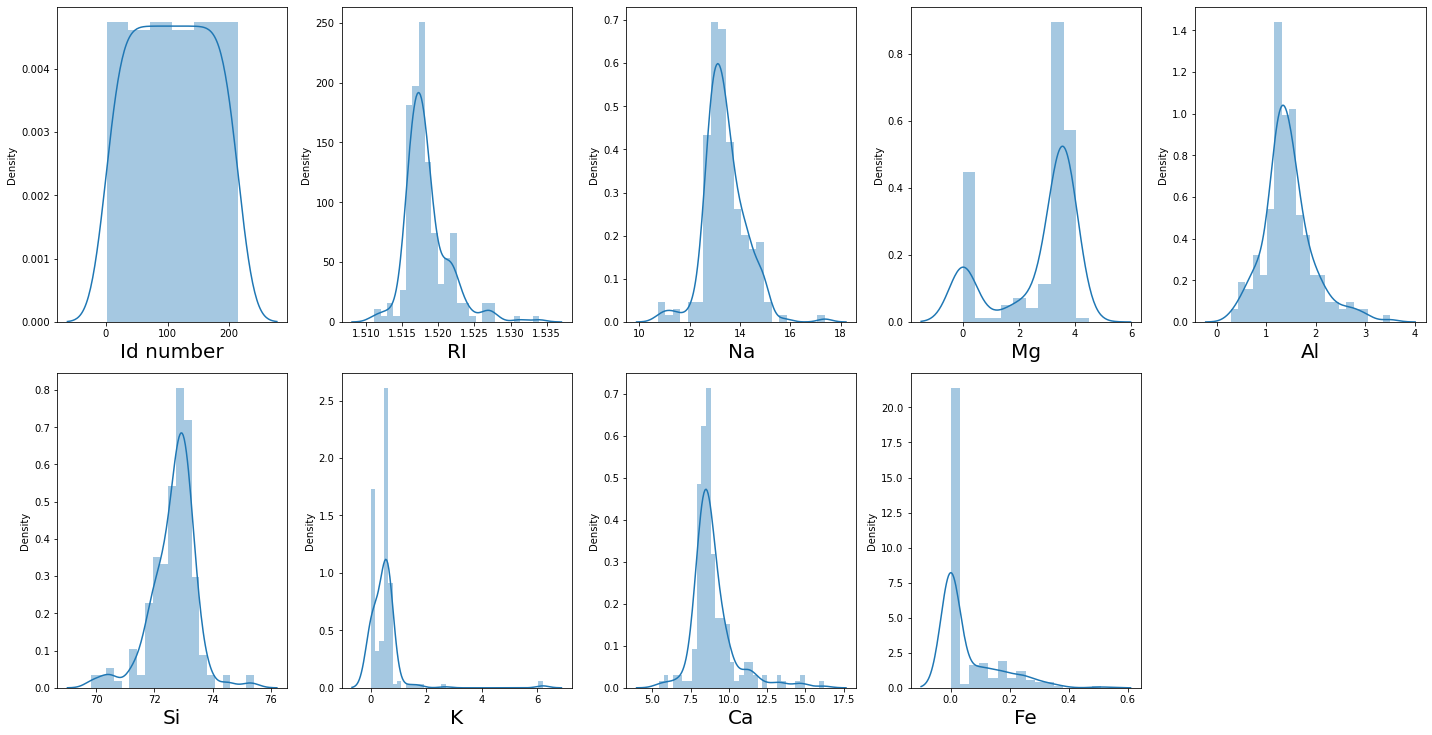

In [20]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber = 1
for column in cont_col:
    if plotnumber<=10:
        ax = plt.subplot(5,5,plotnumber)
        sns.distplot(cont_col[column])
        plt.xlabel(column,fontsize=20)    
    plotnumber+=1
plt.tight_layout()    

most of the columns are almost normally distributed except K, Mg and Fe

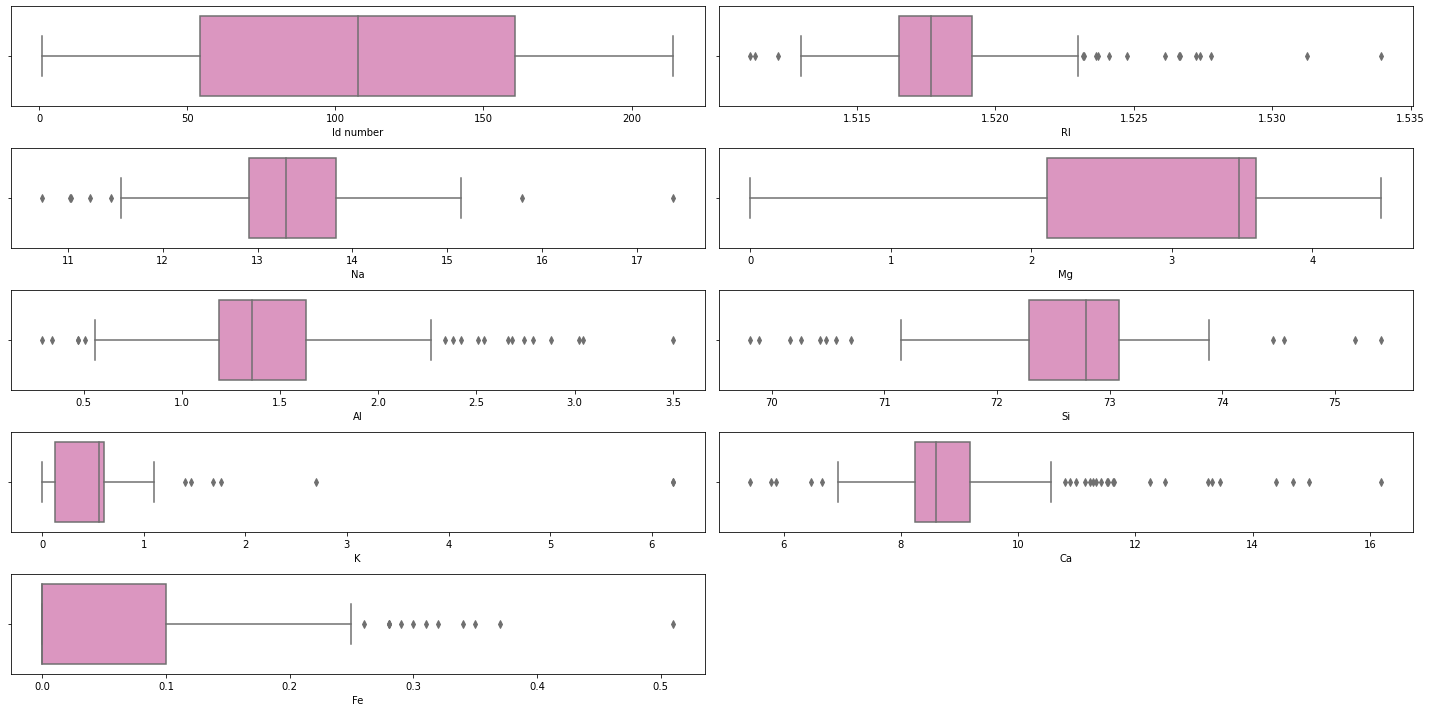

In [21]:
#Let's see the how data is distributed 
plt.figure(figsize=(20,10),facecolor='white')
plotnumber=1
for column in cont_col:
    if plotnumber<=20:
        ax=plt.subplot(5,2,plotnumber)
        sns.boxplot(cont_col[column],palette = 'Set2_r')
        plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.tight_layout()

Almost all the columns contain outliers except Id number and Mg

In [22]:
df.drop("Id number",axis = 1, inplace=True)

In [23]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in df.columns:
    if df[i].dtypes == "object":
         df[i] = le.fit_transform(df[i].values.reshape(-1,1))

In [24]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Fe,Type of glass
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,1


<AxesSubplot:>

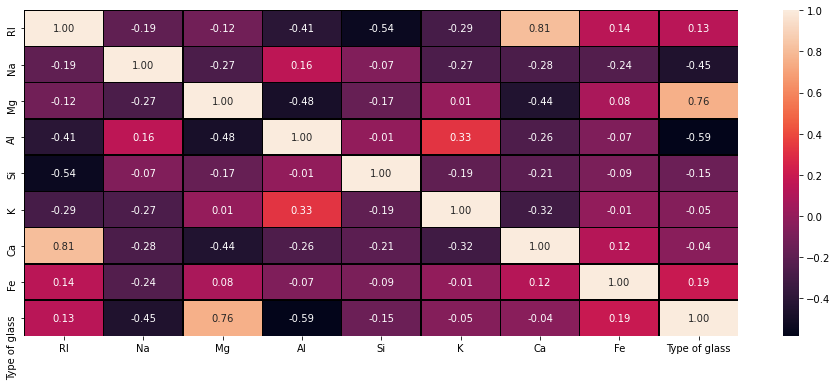

In [25]:
plt.figure(figsize =(16,6))
sns.heatmap(df.corr(),annot=True,linewidths = 0.5,linecolor="black",fmt = '.2f')

'Mg', 'K', 'Fe' these columns consist high number of zero value.Magnesium(Mg) highly correlated with target variable. refractive index(Ri) and Ca(Calcium) highly correlated with each other

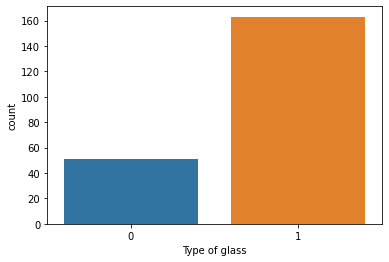

In [26]:
sns.countplot(x="Type of glass",data=df)
plt.show()

0 ==> non-window glass, 1 ==> window glass

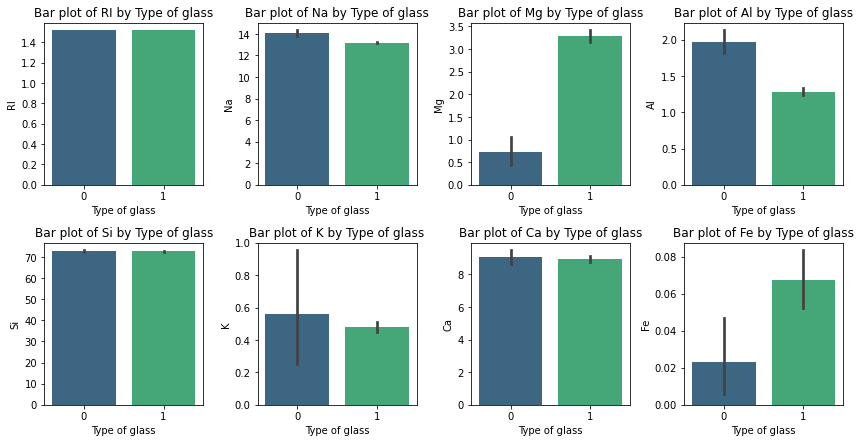

In [27]:

# Loop through each column (excluding the target column)
plt.figure(figsize=(12, 15))
plot_number = 1

for column in df.columns:
    if column != 'Type of glass' and plot_number <= 10:
        ax = plt.subplot(5, 4, plot_number)
        sns.barplot(data=df, x='Type of glass', y=column, palette='viridis')
        plt.title(f'Bar plot of {column} by Type of glass')
        plot_number += 1

plt.tight_layout()
plt.show()

1. Range of refractive index is equal in both window glass and non-window glass.
2. level of sodium(Na) littil high in non-window glass.
3. content of Magnesium(Mg) very less in non-window glass compare to window glass.
4. Aluminum(Al) content is high in non-window glass
5. Equal part in the case of silicon(Si)
6. Potassium(k) case also similar both case.
7. Equal proportion (Ca)
8. compritivly high in window glass (Iron(Fe))

In [28]:
df.skew()

RI               1.625431
Na               0.454181
Mg              -1.152559
Al               0.907290
Si              -0.730447
K                6.551648
Ca               2.047054
Fe               1.754327
Type of glass   -1.237086
dtype: float64

Based on the provided skewness values, the columns that have skewness exceeding the threshold of -/+ 0.5 are:

RI (skewness = 1.625431)
Mg (skewness = -1.152559)
Al (skewness = 0.907290)
K (skewness = 6.551648)
Ca (skewness = 2.047054)
Fe (skewness = 1.754327)

In [29]:
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(method='yeo-johnson')
df['RI'] = pt.fit_transform(df['RI'].values.reshape(-1, 1))
df['RI'].skew()

1.330265475645961

In [30]:
df["RI"] = np.sqrt(df["RI"])
df["RI"].skew()

0.3502563077998383

In [31]:
df.isnull().sum()

RI               127
Na                 0
Mg                 0
Al                 0
Si                 0
K                  0
Ca                 0
Fe                 0
Type of glass      0
dtype: int64

In [32]:
df["RI"]=df["RI"].fillna(df["RI"].mean())

In [33]:
df.isnull().sum()

RI               0
Na               0
Mg               0
Al               0
Si               0
K                0
Ca               0
Fe               0
Type of glass    0
dtype: int64

In [34]:
df['Mg'] = np.log1p(df['Mg'])
df["Mg"].skew()

-1.3334893135401027

In [35]:
df['Mg'] = pt.fit_transform(df['Mg'].values.reshape(-1, 1))

In [36]:
df["Mg"].skew()

-1.0354921943841369

In [37]:
df["Al"] = np.sqrt(df["Al"])
df["Al"].skew()

0.09234957956599107

In [38]:
df['K'] = np.log1p(df['K'])
df["K"].skew()

1.9779929475910905

In [39]:
df['K'] = pt.fit_transform(df['K'].values.reshape(-1, 1))
df["K"].skew()

-0.02321670527842238

In [40]:
df["Ca"] = np.sqrt(df["Ca"])
df["Ca"].skew()

1.572030859370953

In [41]:
df['Ca'] = pt.fit_transform(df['Ca'].values.reshape(-1, 1))
df["Ca"].skew()

-0.21371227230972087

In [42]:
df['Fe'] = pt.fit_transform(df['Fe'].values.reshape(-1, 1))
df["Fe"].skew()

0.8585077738012972

In [43]:
df["Fe"] = np.cbrt(df["Fe"])
df["Fe"].skew()

0.7767852104028213

In [44]:
df['Fe'] = np.log1p(df['Fe'])
df["Fe"].skew()

0.7612705510532981

In [45]:
df.skew()

RI               0.543631
Na               0.454181
Mg              -1.035492
Al               0.092350
Si              -0.730447
K               -0.023217
Ca              -0.213712
Fe               0.761271
Type of glass   -1.237086
dtype: float64

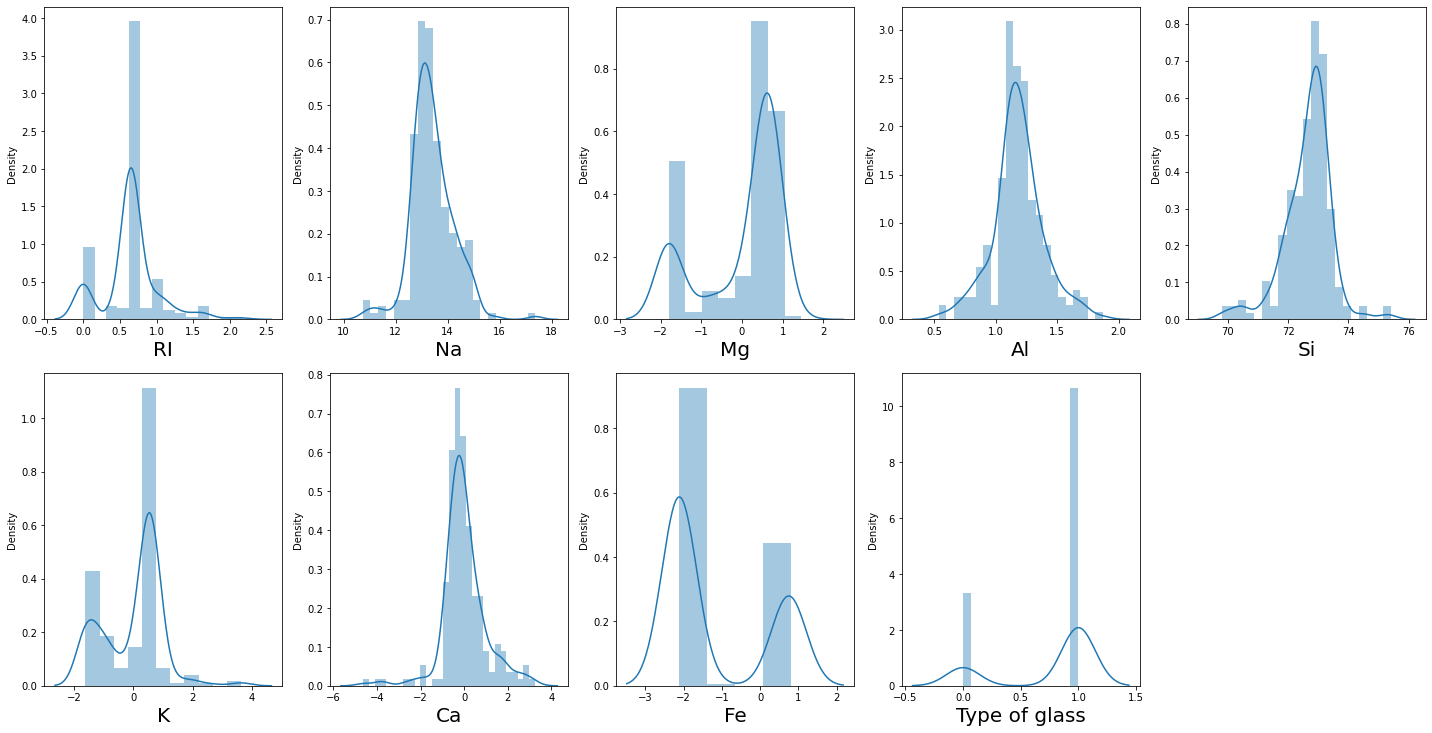

In [46]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber = 1
for column in df:
    if plotnumber<=10:
        ax = plt.subplot(5,5,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)    
    plotnumber+=1
plt.tight_layout()    

In [47]:
# handle outliers
from scipy.stats import zscore

z = np.abs(zscore(df))
z.shape

(214, 9)

In [48]:
threshold = 3
print (np.where(z>3))

(array([ 21, 106, 106, 106, 107, 107, 107, 163, 163, 163, 171, 172, 184,
       184, 185, 186, 188, 201], dtype=int64), array([3, 0, 1, 4, 0, 4, 6, 3, 4, 6, 5, 5, 1, 4, 6, 6, 4, 4], dtype=int64))


In [49]:
print('Shape before removing outliers:', df.shape)

df_new = df[(z < threshold).all(axis=1)]

print('Shape after removing outliers:', df_new.shape)

Shape before removing outliers: (214, 9)
Shape after removing outliers: (203, 9)


In [50]:
data_loss=((214-203)/214)*100
data_loss

5.14018691588785

I lsot 5% data when remove the outlier

In [51]:
x = df_new.drop("Type of glass", axis = 1)
y = df_new["Type of glass"]

In [52]:
#Multicollinearity using Variance_inflation_factor
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif =pd.DataFrame()
vif['vif'] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['Features'] = x.columns

In [53]:
vif

,vif,Features
0,5.426495,RI
1,614.830222,Na
2,3.536903,Mg
3,106.069420,Al
4,727.017705,Si
5,2.650219,K
6,2.963356,Ca
7,1.805226,Fe


If I set my VIF (Variance Inflation Factor) threshold value to 10, I found that RI columns exceed the limit so let's drop the column

In [54]:
x.drop("Si",axis=1,inplace = True)

In [55]:
vif =pd.DataFrame()
vif['vif'] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['Features'] = x.columns
vif

,vif,Features
0,5.370313,RI
1,97.741899,Na
2,3.031587,Mg
3,90.267590,Al
4,1.976133,K
5,2.071589,Ca
6,1.799955,Fe


In [56]:
x.drop("Na",axis=1,inplace = True)

In [57]:
vif =pd.DataFrame()
vif['vif'] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['Features'] = x.columns
vif

,vif,Features
0,5.141010,RI
1,1.681865,Mg
2,5.319918,Al
3,1.526606,K
4,1.826148,Ca
5,1.767543,Fe


In [58]:
# oversampling the data
from imblearn.over_sampling import SMOTE
sm = SMOTE()
x,y = sm.fit_resample(x,y)

In [59]:
y.value_counts()

1    160
0    160
Name: Type of glass, dtype: int64

In [60]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
x = pd.DataFrame(scale.fit_transform(x), columns= x.columns)
x

,RI,Mg,Al,K,Ca,Fe
0,0.811025,1.770244,-1.046452,-0.788618,-0.232696,-0.634778
1,0.081950,1.050052,-0.471826,0.763037,-1.347057,-0.634778
2,0.081950,1.010372,-0.105765,0.516540,-1.415569,-0.634778
3,0.081950,1.121722,-0.620688,0.980264,-0.842602,-0.634778
4,0.081950,1.065952,-0.729506,0.934224,-1.030567,-0.634778
...,...,...,...,...,...,...
315,-0.512515,0.074899,-0.658376,-1.136312,0.584428,-0.634778
316,0.081950,-1.150915,1.403450,-0.856160,-0.124890,1.505784
317,0.081950,-1.150915,0.990716,-1.089314,-0.368141,1.554935
318,0.081950,-1.150915,1.290504,-1.089807,-0.226377,-0.634778


In [77]:
#!pip install --upgrade statsmodels

In [82]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier,GradientBoostingClassifier,BaggingClassifier,AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [80]:
for i in range(0,500):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=i)
    lr =LogisticRegression()
    lr.fit(x_train,y_train)
    pred_train = lr.predict(x_train)
    pred_test=lr.predict(x_test)
    if round(accuracy_score(y_train,pred_train)*100,1)==round(accuracy_score(y_test,pred_test)*100,1):
        print('At randomstate',i,'The model performance very well')
        print('At random state:-',i)
        print("Train accuracy is:-", accuracy_score(y_train,pred_train)*100)
        print("Testing accuracy is:-", accuracy_score(y_test,pred_test)*100)

At randomstate 9 The model performance very well
At random state:- 9
Train accuracy is:- 96.875
Testing accuracy is:- 96.875
At randomstate 16 The model performance very well
At random state:- 16
Train accuracy is:- 96.875
Testing accuracy is:- 96.875
At randomstate 46 The model performance very well
At random state:- 46
Train accuracy is:- 98.4375
Testing accuracy is:- 98.4375
At randomstate 53 The model performance very well
At random state:- 53
Train accuracy is:- 96.875
Testing accuracy is:- 96.875
At randomstate 58 The model performance very well
At random state:- 58
Train accuracy is:- 98.4375
Testing accuracy is:- 98.4375
At randomstate 77 The model performance very well
At random state:- 77
Train accuracy is:- 98.4375
Testing accuracy is:- 98.4375
At randomstate 121 The model performance very well
At random state:- 121
Train accuracy is:- 98.4375
Testing accuracy is:- 98.4375
At randomstate 135 The model performance very well
At random state:- 135
Train accuracy is:- 98.4375
Te

In [81]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=46)

In [83]:
# function for model building
def eval(r):
    model=r
    model.fit(x_train,y_train)
    pred = model.predict(x_test)
    acc = accuracy_score(y_test,pred)
    f_score = f1_score(y_test,pred)
    scr = cross_val_score(model,x,y,cv=3)
    print("Accuracy score is:",acc)
    print("F1 score is:",f_score)
    print(confusion_matrix(y_test,pred))
    print("\n")
    print(classification_report(y_test,pred))
    print("\n")
    print("cross validation score :",scr.mean())

In [84]:
eval(LogisticRegression())

Accuracy score is: 0.984375
F1 score is: 0.9859154929577464
[[28  0]
 [ 1 35]]


              precision    recall  f1-score   support

           0       0.97      1.00      0.98        28
           1       1.00      0.97      0.99        36

    accuracy                           0.98        64
   macro avg       0.98      0.99      0.98        64
weighted avg       0.98      0.98      0.98        64



cross validation score : 0.9655557514841592


In [85]:
eval(RandomForestClassifier())

Accuracy score is: 0.96875
F1 score is: 0.9714285714285714
[[28  0]
 [ 2 34]]


              precision    recall  f1-score   support

           0       0.93      1.00      0.97        28
           1       1.00      0.94      0.97        36

    accuracy                           0.97        64
   macro avg       0.97      0.97      0.97        64
weighted avg       0.97      0.97      0.97        64



cross validation score : 0.9655851407747017


In [86]:
eval(ExtraTreesClassifier())

Accuracy score is: 0.96875
F1 score is: 0.9722222222222222
[[27  1]
 [ 1 35]]


              precision    recall  f1-score   support

           0       0.96      0.96      0.96        28
           1       0.97      0.97      0.97        36

    accuracy                           0.97        64
   macro avg       0.97      0.97      0.97        64
weighted avg       0.97      0.97      0.97        64



cross validation score : 0.9655557514841592


In [87]:
eval(GradientBoostingClassifier())

Accuracy score is: 0.984375
F1 score is: 0.9859154929577464
[[28  0]
 [ 1 35]]


              precision    recall  f1-score   support

           0       0.97      1.00      0.98        28
           1       1.00      0.97      0.99        36

    accuracy                           0.98        64
   macro avg       0.98      0.99      0.98        64
weighted avg       0.98      0.98      0.98        64



cross validation score : 0.9624992652677364


In [88]:
eval(BaggingClassifier())

Accuracy score is: 0.984375
F1 score is: 0.9859154929577464
[[28  0]
 [ 1 35]]


              precision    recall  f1-score   support

           0       0.97      1.00      0.98        28
           1       1.00      0.97      0.99        36

    accuracy                           0.98        64
   macro avg       0.98      0.99      0.98        64
weighted avg       0.98      0.98      0.98        64



cross validation score : 0.9624698759771939


In [89]:
eval(AdaBoostClassifier())

Accuracy score is: 0.96875
F1 score is: 0.9714285714285714
[[28  0]
 [ 2 34]]


              precision    recall  f1-score   support

           0       0.93      1.00      0.97        28
           1       1.00      0.94      0.97        36

    accuracy                           0.97        64
   macro avg       0.97      0.97      0.97        64
weighted avg       0.97      0.97      0.97        64



cross validation score : 0.9469229412801975


Based on the output above, after comparing the accuracy score and cross-validation score, it can be concluded that the Random Forest classifier is the optimal model due to its minimal disparity between accuracy and cross-validation, indicating a lack of overfitting.

In [90]:
parameter={"max_depth":np.arange(1,10),
           "criterion":["gini","entropy"],
            "min_samples_split": [2, 5, 10],
            "n_estimators": [50, 100, 200]}

In [91]:
gcv=GridSearchCV(RandomForestClassifier(),parameter,cv=5)

In [92]:
gcv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]})

In [93]:
gcv.best_params_

{'criterion': 'gini',
 'max_depth': 3,
 'min_samples_split': 10,
 'n_estimators': 50}

In [94]:
final_model=RandomForestClassifier(max_depth=3,criterion="gini",min_samples_split= 10 ,n_estimators = 50)
final_model.fit(x_train,y_train)
pred=final_model.predict(x_test)
acc=accuracy_score(y_test,pred)
f_score=f1_score(y_test,pred)
confusion=confusion_matrix(y_test,pred)
print(acc)
print(f_score)
print(confusion)

0.96875
0.9714285714285714
[[28  0]
 [ 2 34]]


In [95]:
import joblib
joblib.dump(final_model,"glass identification random.pkl")

['glass identification random.pkl']